In [ ]:
from IPython.display import Image
Image(url='https://www.tensorflow.org/images/iris_three_species.jpg')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(r'/content/iris.data', header = None, names = names)

In [ ]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.shape

(150, 5)

In [ ]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<Figure size 1400x800 with 0 Axes>

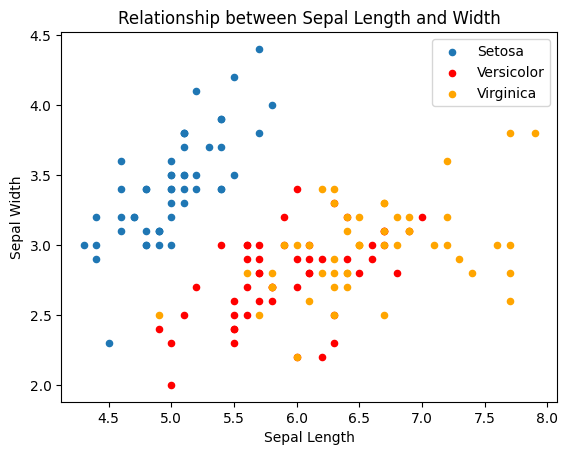

In [ ]:
plt.figure(figsize=(14,8))
ax = df[df.species=='Iris-setosa'].plot.scatter(x='sepal_length', y='sepal_width', label='Setosa')
df[df.species=='Iris-versicolor'].plot.scatter(x='sepal_length', y='sepal_width', color='red', label='Versicolor', ax=ax)
df[df.species=='Iris-virginica'].plot.scatter(x='sepal_length', y='sepal_width', color='orange', label='Virginica', ax=ax)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_title("Relationship between Sepal Length and Width")
plt.show()

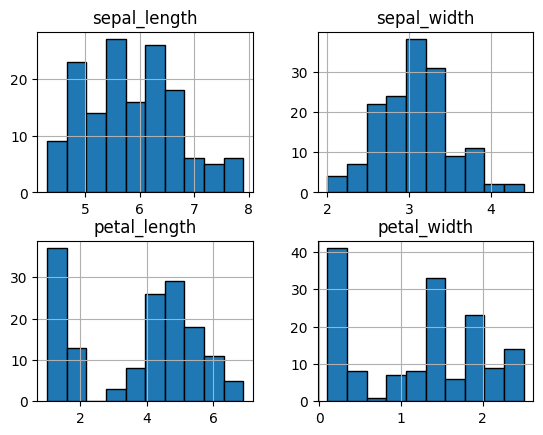

In [ ]:
df.hist(edgecolor='black', linewidth=1)
plt.show()

<Axes: ylabel='Density'>

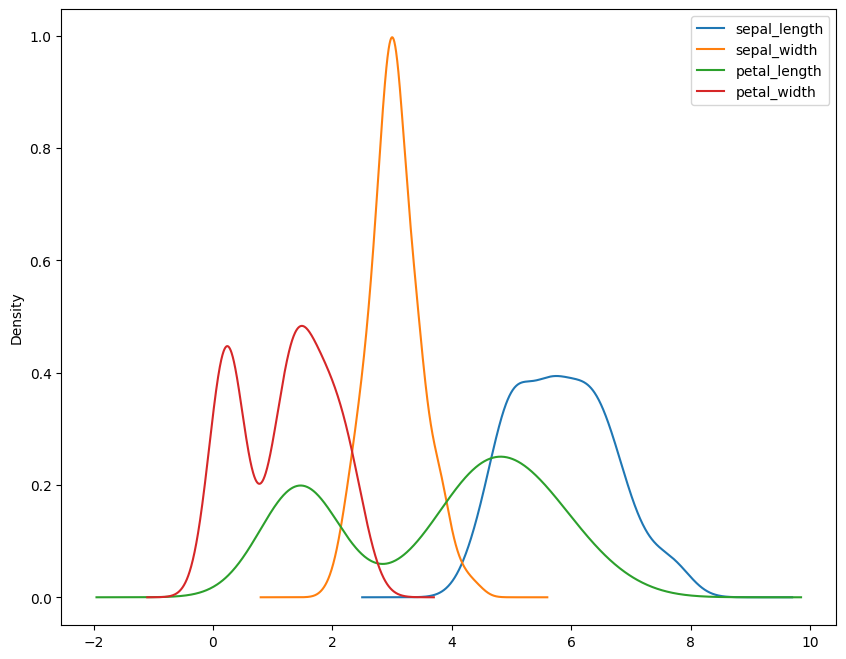

In [ ]:
df.plot(kind = "density", figsize=(10,8))

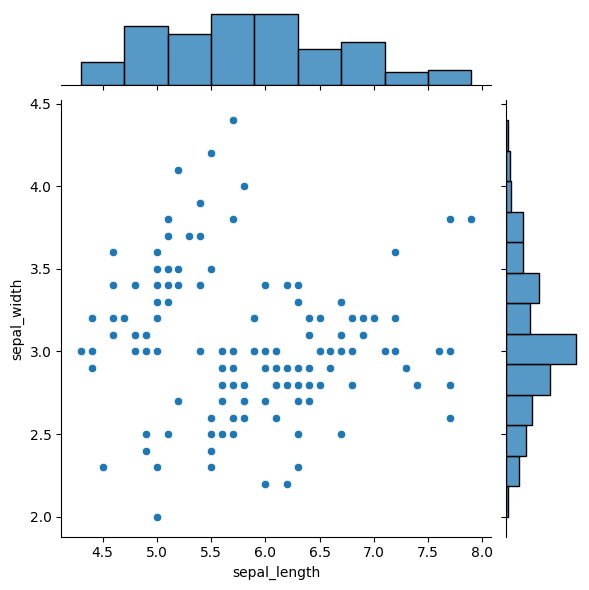

In [ ]:
sns.jointplot(x = 'sepal_length', y = 'sepal_width', data = df)

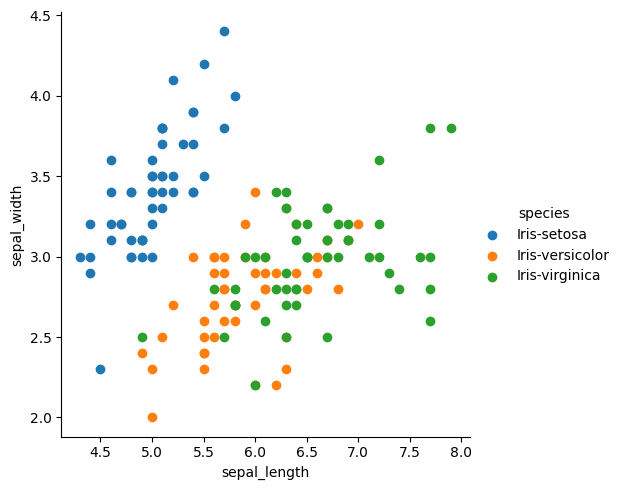

In [ ]:
#seaborn scatterplot by species on sepal_length vs sepal_width
g = sns.FacetGrid(df, hue='species', height=5)
g = g.map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

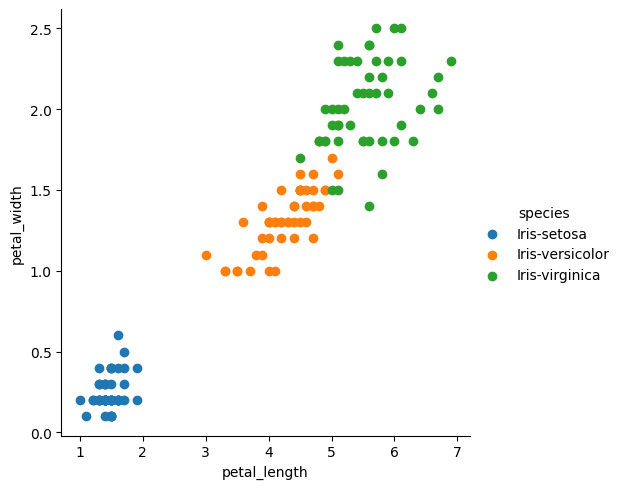

In [ ]:
# seaborn scatterplot by species on petal_length vs petal_width. Remember? We did it first using Pandas plot.
g = sns.FacetGrid(df, hue='species', height=5)
g = g.map(plt.scatter, 'petal_length', 'petal_width').add_legend()

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

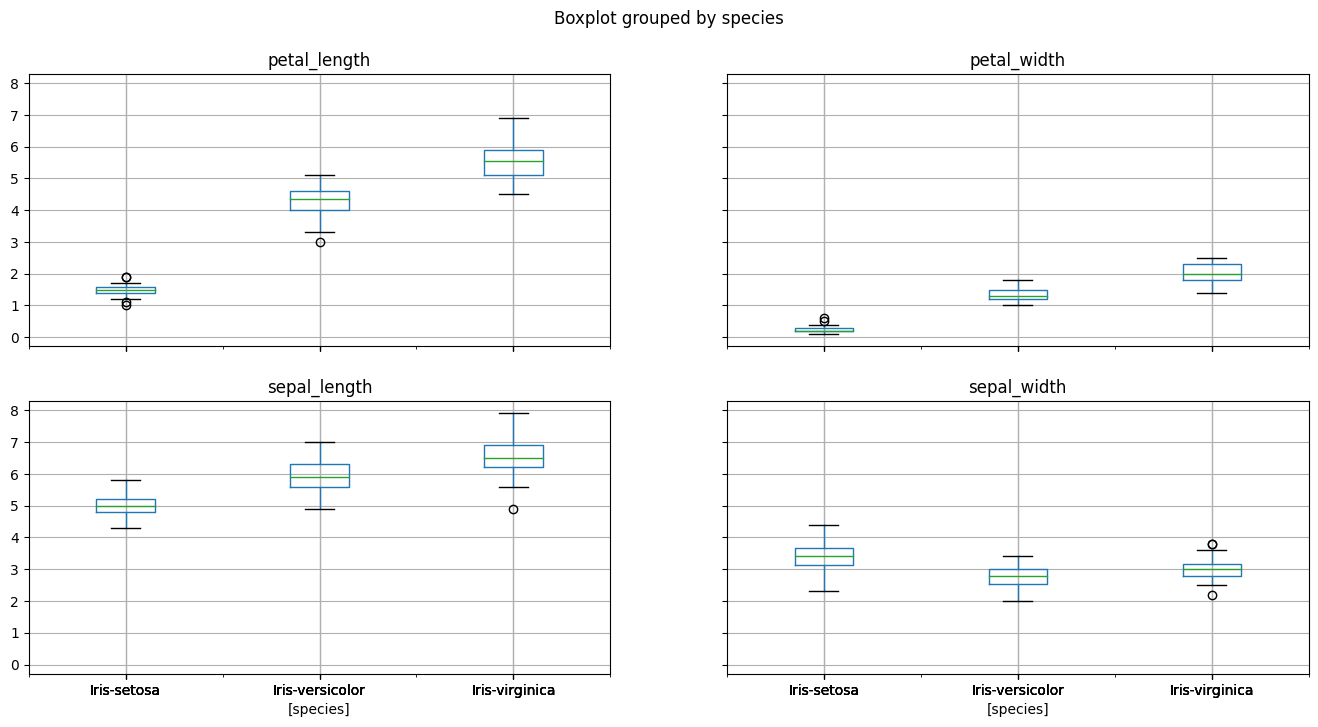

In [ ]:
# We did some seaborn plotting. Let's try another cool pandas plotting. Yes, BOXPLOT!
# It will create boxes represeting data values

# Seaborn boxplot for on each features split out by specis. Try this plot again just changing figsize.
df.boxplot(by = 'species', figsize = (16,8))

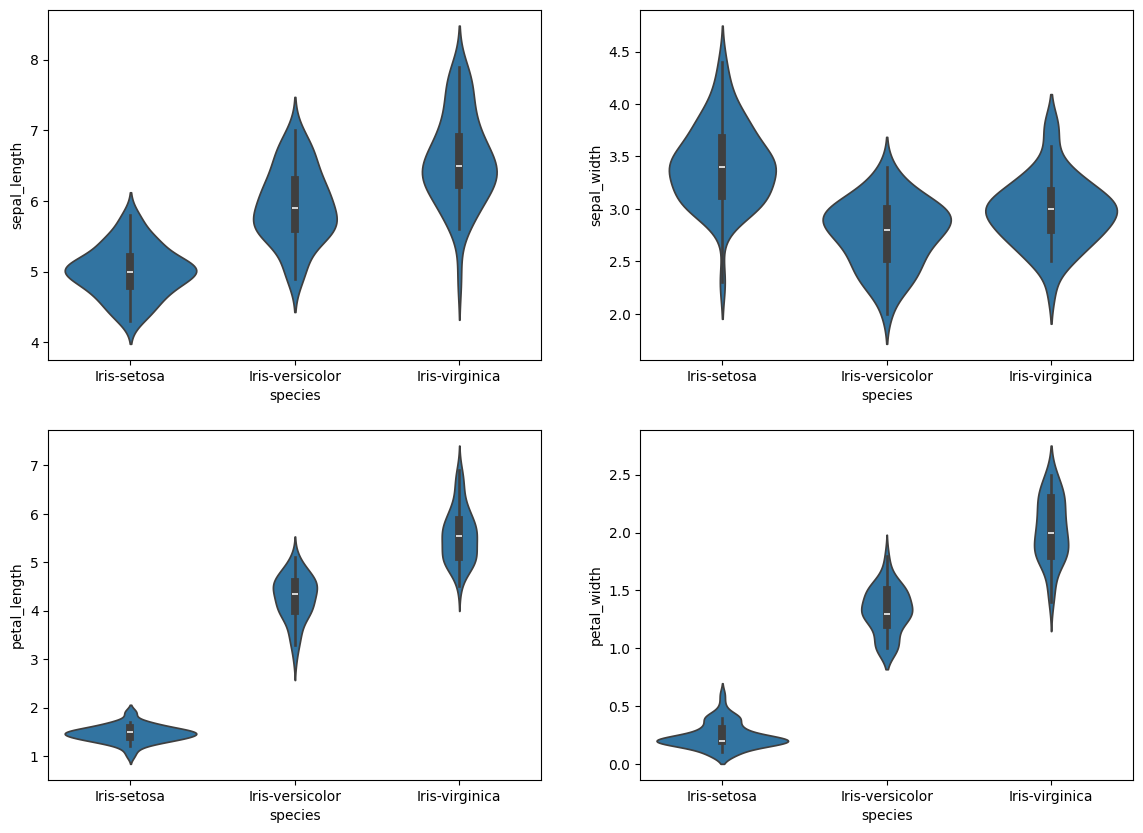

In [ ]:
# The violinplot shows density of the length and width in the species
# Denser regions of the data are fatter, and sparser thiner in a violin plot
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal_length', data=df)

plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width', data=df)

plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length', data=df)

plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width', data=df)

plt.show()


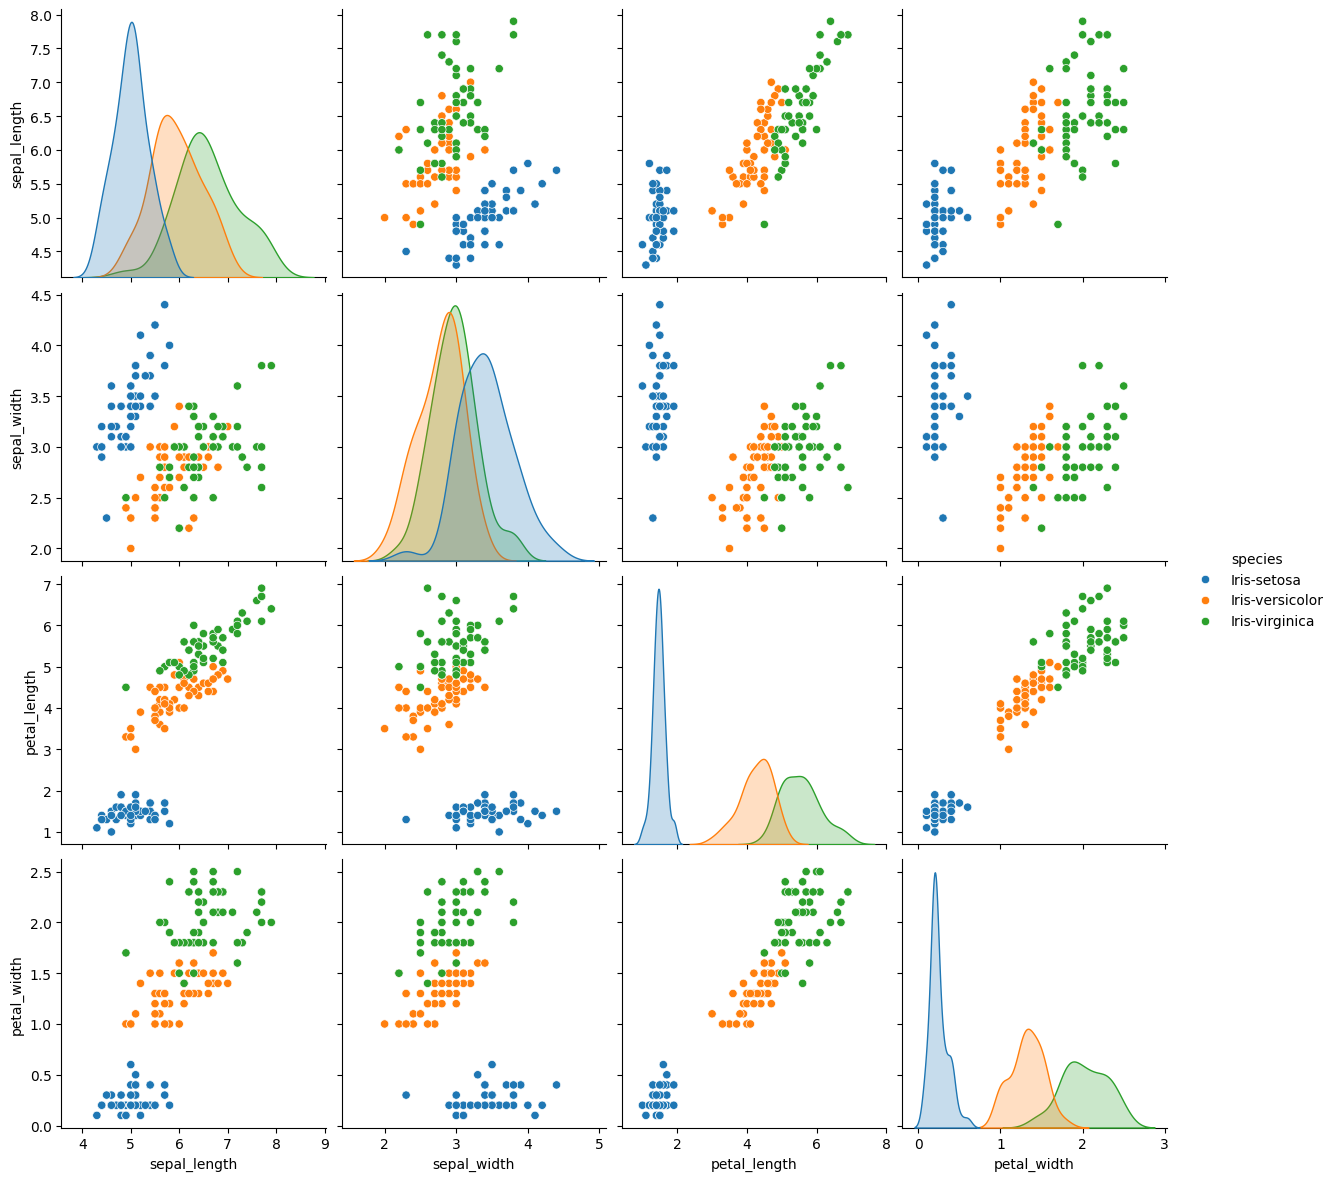

In [ ]:
sns.pairplot(data = df, hue = 'species', height = 3)

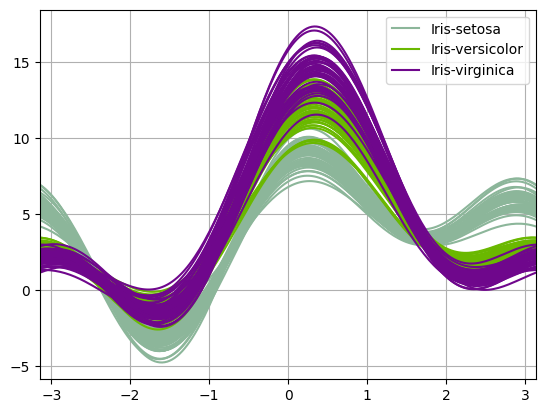

In [ ]:
# One more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(df, 'species')
plt.show()

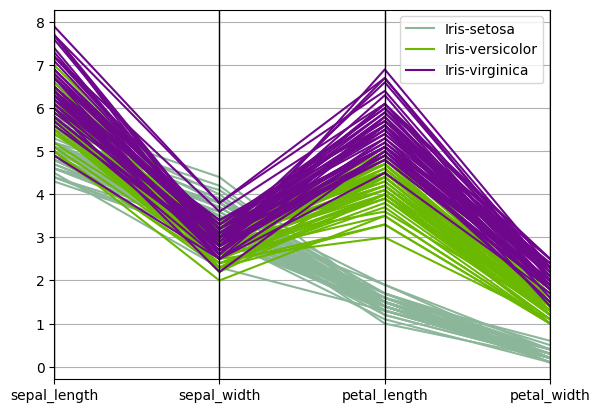

In [ ]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, 'species')
plt.show()

<Axes: >

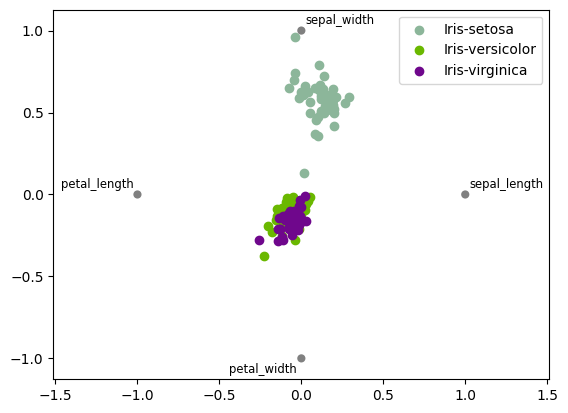

In [ ]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(df, 'species')

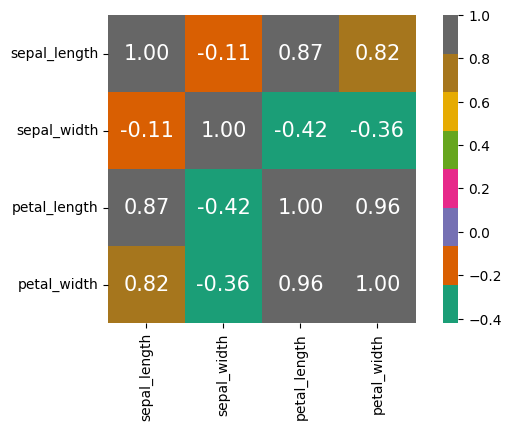

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Draw the heatmap with the correlation matrix
plt.figure(figsize=(7,4))
sns.heatmap(numeric_df.corr(), cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 15}, cmap='Dark2')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
X = df.iloc[:, 0:4]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Check the shape of the train and test datasets
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))


There are 105 samples in the training set and 45 samples in the test set


In [ ]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
143,6.8,3.2,5.9,2.3
27,5.2,3.5,1.5,0.2
32,5.2,4.1,1.5,0.1
11,4.8,3.4,1.6,0.2
59,5.2,2.7,3.9,1.4


In [ ]:
y_train.head()

,species
143,Iris-virginica
27,Iris-setosa
32,Iris-setosa
11,Iris-setosa
59,Iris-versicolor


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Standardized features\n')
print(str(X_train[:4]))

Standardized features

[[ 1.14373911  0.36488898  1.22066793  1.45397038]
 [-0.75871803  1.0788022  -1.27467978 -1.30269746]
 [-0.75871803  2.50662863 -1.27467978 -1.43396735]
 [-1.23433231  0.84083112 -1.21796734 -1.30269746]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Instantiate the model
model = DecisionTreeClassifier()

#Fitting the model
model.fit(X_train, y_train)

#Predict on test data
y_pred = model.predict(X_test)

#Evaluate accuracy
print('The accuracy of the Decision Tree is', accuracy_score(y_pred, y_test))

The accuracy of the Decision Tree is 0.9333333333333333


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The accuracy of the Logistic Regression is', accuracy_score(y_pred, y_test))

The accuracy of the Logistic Regression is 0.9555555555555556


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print ('The accuracy of the KNN is', accuracy_score(y_pred, y_test))

The accuracy of the KNN is 0.9333333333333333


The accuracy of the KNN 1 is 0.9111111111111111
The accuracy of the KNN 2 is 0.9111111111111111
The accuracy of the KNN 3 is 0.9111111111111111
The accuracy of the KNN 4 is 0.9111111111111111
The accuracy of the KNN 5 is 0.9111111111111111
The accuracy of the KNN 6 is 0.9333333333333333
The accuracy of the KNN 7 is 0.9333333333333333
The accuracy of the KNN 8 is 0.9333333333333333
The accuracy of the KNN 9 is 0.9333333333333333
The accuracy of the KNN 10 is 0.9333333333333333


Text(0, 0.5, 'Accuray')

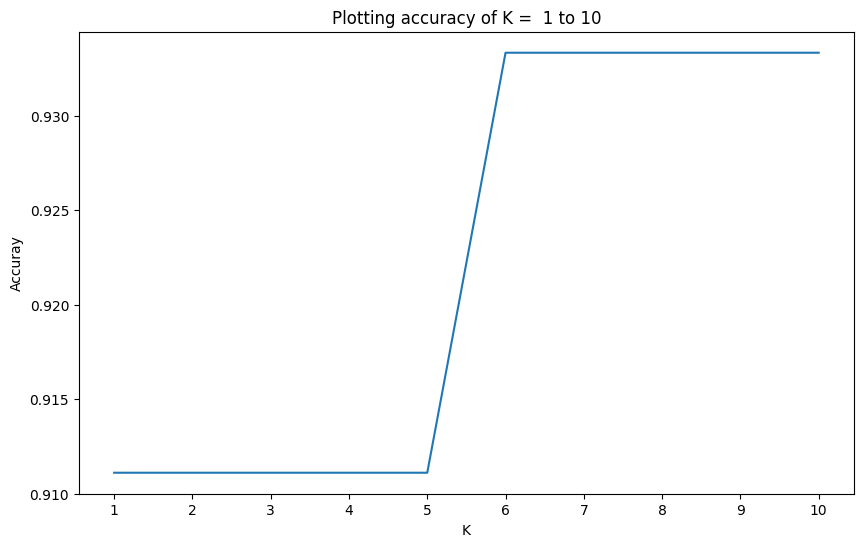

In [ ]:
result = []
x = np.arange(1,11)
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('The accuracy of the KNN {} is {}'.format( i, accuracy_score(y_pred, y_test)))
    result.append(accuracy_score(y_pred, y_test))
plt.figure(figsize = (10,6))
plt.plot(x, result)
plt.xticks(x)
plt.title('Plotting accuracy of K =  1 to 10')
plt.xlabel('K')
plt.ylabel('Accuray')

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Initialize the model with adjusted parameters
model = LinearSVC(C=10, dual=False, max_iter=10000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
print('The accuracy of the Support Vector Machine is', accuracy_score(y_pred, y_test))


The accuracy of the Support Vector Machine is 0.9333333333333333


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('The accuracy of the Random Forest is', accuracy_score(y_pred, y_test))

The accuracy of the Random Forest is 0.9111111111111111
